## Business Objective:
Generate the features from the dataset and use them to recommend the books accordingly to the users.
Content The Book-Crossing dataset comprises 3 files.                                                                             
● Users                                                                                                                        
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.                                                       
● Books                                                                                                                         
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.  
● Ratings                                                                                                                       
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.                                                                   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
books=pd.read_csv("Books.csv")

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
print(books.shape)

(271360, 8)


In [5]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [6]:
#there is 1-null vakue in the book-author

In [7]:
book_author_NA = pd.isnull(books["Book-Author"])
books[book_author_NA]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [8]:
#there are two null rows in the Publisher

In [9]:
publisher_NA = pd.isnull(books["Publisher"])
books[publisher_NA]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [10]:
#there are three null rows in the Image-URL-L

In [11]:
image_L_NA = pd.isnull(books["Image-URL-L"])
books[image_L_NA]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [12]:
#in these rows the book author name column is replaced and in a series manner the other columns are replaced 
# and hence these columns are also dropped

In [13]:
#since the total no rows is 271360 we can drop the null valued rows of the Book-Author and publisher and image-url-L

In [14]:
books = books.dropna()

In [15]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [16]:
print(books.duplicated().sum())

0


In [17]:
#hence in the books data are no null values are duplicated data

In [18]:
books = books.rename(columns={'Book-Title': 'Title', 'Book-Author': 'Author','Year-Of-Publication':'Year','Image-URL-S':'Image_URL_S','Image-URL-M':'Image_URL_M','Image-URL-L':'Image_URL_L'})

In [19]:
books.head()

,ISBN,Title,Author,Year,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [20]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ISBN         271354 non-null  object
 1   Title        271354 non-null  object
 2   Author       271354 non-null  object
 3   Year         271354 non-null  object
 4   Publisher    271354 non-null  object
 5   Image_URL_S  271354 non-null  object
 6   Image_URL_M  271354 non-null  object
 7   Image_URL_L  271354 non-null  object
dtypes: object(8)
memory usage: 18.6+ MB


In [21]:
#all the columns are of the data type objects

In [22]:
books.describe()

,ISBN,Title,Author,Year,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
count,271354,271354,271354,271354,271354,271354,271354,271354
unique,271354,242130,102020,200,16803,271038,271038,271038
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/014062080X.0...,http://images.amazon.com/images/P/014062080X.0...,http://images.amazon.com/images/P/014062080X.0...
freq,1,27,632,13902,7535,2,2,2


In [23]:
#from thisdescription we understand that total count and the unique values of the uniques features like image_URL_s is duplictaed 
#we need to find it and drop them

In [24]:
s=books[books.duplicated('Image_URL_S')]
m=books[books.duplicated('Image_URL_M')]
l=books[books.duplicated('Image_URL_L')]
print("Image-S",s.shape)
print("Image-M",m.shape)
print("Image-L",l.shape)

Image-S (316, 8)
Image-M (316, 8)
Image-L (316, 8)


In [25]:
y=books[books["Image_URL_S"] == "http://images.amazon.com/images/P/042511774X.01.THUMBZZZ.jpg"]
a=books[books["Image_URL_S"] == "http://images.amazon.com/images/P/038572179X.01.THUMBZZZ.jpg"]
b=books[books["Image_URL_S"] == "http://images.amazon.com/images/P/044651747X.01.THUMBZZZ.jpg"]
y

,ISBN,Title,Author,Year,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
66,042511774X,Breathing Lessons,Anne Tyler,1994,Berkley Publishing Group,http://images.amazon.com/images/P/042511774X.0...,http://images.amazon.com/images/P/042511774X.0...,http://images.amazon.com/images/P/042511774X.0...
210793,042511774x,Breathing Lessons,Anne Tyler,1994,Berkley Publishing Group,http://images.amazon.com/images/P/042511774X.0...,http://images.amazon.com/images/P/042511774X.0...,http://images.amazon.com/images/P/042511774X.0...


In [26]:
a

,ISBN,Title,Author,Year,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
139,038572179X,Atonement : A Novel,IAN MCEWAN,2003,Anchor,http://images.amazon.com/images/P/038572179X.0...,http://images.amazon.com/images/P/038572179X.0...,http://images.amazon.com/images/P/038572179X.0...
188718,038572179x,Atonement : A Novel,IAN MCEWAN,2003,Anchor,http://images.amazon.com/images/P/038572179X.0...,http://images.amazon.com/images/P/038572179X.0...,http://images.amazon.com/images/P/038572179X.0...


In [27]:
b

,ISBN,Title,Author,Year,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
157,044651747X,Puerto Vallarta Squeeze,Robert James Waller,1995,Warner Books,http://images.amazon.com/images/P/044651747X.0...,http://images.amazon.com/images/P/044651747X.0...,http://images.amazon.com/images/P/044651747X.0...
246147,044651747x,Puerto Vallarta Squeeze,Robert James Waller,1995,Warner Books,http://images.amazon.com/images/P/044651747X.0...,http://images.amazon.com/images/P/044651747X.0...,http://images.amazon.com/images/P/044651747X.0...


In [28]:
#this duplicates is unable to be found because of the upper and lower case differnce in the ISBN numbers

In [29]:
books['ISBN'] = books['ISBN'].apply(str.upper)

In [30]:
books[books["Image_URL_S"] == "http://images.amazon.com/images/P/044651747X.01.THUMBZZZ.jpg"]


,ISBN,Title,Author,Year,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
157,044651747X,Puerto Vallarta Squeeze,Robert James Waller,1995,Warner Books,http://images.amazon.com/images/P/044651747X.0...,http://images.amazon.com/images/P/044651747X.0...,http://images.amazon.com/images/P/044651747X.0...
246147,044651747X,Puerto Vallarta Squeeze,Robert James Waller,1995,Warner Books,http://images.amazon.com/images/P/044651747X.0...,http://images.amazon.com/images/P/044651747X.0...,http://images.amazon.com/images/P/044651747X.0...


In [31]:
books.describe()

,ISBN,Title,Author,Year,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
count,271354,271354,271354,271354,271354,271354,271354,271354
unique,271040,242130,102020,200,16803,271038,271038,271038
top,042517400X,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/014062080X.0...,http://images.amazon.com/images/P/014062080X.0...,http://images.amazon.com/images/P/014062080X.0...
freq,2,27,632,13902,7535,2,2,2


In [32]:
print("the count of the duplicated values",books.duplicated().sum())
print("the shape of the books",books.shape)

the count of the duplicated values 194
the shape of the books (271354, 8)


In [33]:
#now we can see the duplicated values and we need to drop the duplicated values

In [34]:
books=books.drop_duplicates()
books.shape

(271160, 8)

In [35]:
books.duplicated().sum()

0

In [36]:
books.describe()

,ISBN,Title,Author,Year,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
count,271160,271160,271160,271160,271160,271160,271160,271160
unique,271040,242130,102020,200,16803,271038,271038,271038
top,081956270X,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/044023574X.0...,http://images.amazon.com/images/P/044023574X.0...,http://images.amazon.com/images/P/044023574X.0...
freq,2,27,631,13893,7532,2,2,2


In [37]:
s=books[books.duplicated('Image_URL_S')]
print("the shape of duplicated values",s.shape)
print("the shape of the dataset",books.shape)

the shape of duplicated values (122, 8)
the shape of the dataset (271160, 8)


In [38]:
books=books.drop_duplicates(subset=['Image_URL_S'])
books.shape

(271038, 8)

In [39]:
books.describe()

,ISBN,Title,Author,Year,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
count,271038,271038,271038,271038,271038,271038,271038,271038
unique,271038,242129,102020,200,16803,271038,271038,271038
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
freq,1,27,631,13893,7532,1,1,1


In [40]:
books["Year"].dtype

dtype('O')

In [41]:
books['Year'] = books['Year'].astype(int)

In [42]:
books["Year"].dtype

dtype('int32')

In [43]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271038 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ISBN         271038 non-null  object
 1   Title        271038 non-null  object
 2   Author       271038 non-null  object
 3   Year         271038 non-null  int32 
 4   Publisher    271038 non-null  object
 5   Image_URL_S  271038 non-null  object
 6   Image_URL_M  271038 non-null  object
 7   Image_URL_L  271038 non-null  object
dtypes: int32(1), object(7)
memory usage: 17.6+ MB


In [44]:
books["Year"].describe()

count    271038.000000
mean       1959.771021
std         257.950937
min           0.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: Year, dtype: float64

In [45]:
#here in the year column the min year is 0 and the maximum year is 2050
x=books.Year.unique()
x.sort()

In [46]:
x

array([   0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908,
       1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924,
       1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935,
       1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021,
       2024, 2026, 2030, 2037, 2038, 2050])

In [47]:
y = books['Year'].value_counts(ascending=False)
y.head(60)

2002    17613
1999    17410
2001    17336
2000    17212
1998    15751
1997    14872
2003    14329
1996    14012
1995    13523
1994    11777
1993    10592
1992     9884
1991     9379
1990     8651
1989     7926
1988     7487
1987     6523
1986     5836
2004     5832
1985     5338
1984     4983
0        4611
1983     4497
1982     4195
1981     3276
1980     2671
1979     2208
1978     2131
1977     1897
1976     1595
1975     1219
1974     1023
1973      922
1972      772
1971      539
1970      458
1969      339
1968      233
1966      183
1967      176
1965      173
1964      149
1960      133
1963      132
1961      132
1962      123
1959      103
1958       77
1957       75
1956       74
1955       69
1953       63
1954       53
2005       46
1951       40
1940       36
1952       34
1920       33
1950       32
1911       19
Name: Year, dtype: int64

In [48]:
#but the actually posiible year is only in the range of 1806 to 2020
#hence we will replace all the other values with the mode


In [49]:
books.loc[(books["Year"] >= 0) & (books["Year"] <=1806),"Year"] = None

In [50]:
books.loc[(books["Year"] >= 2022) & (books["Year"] <= 2050),"Year"] = None

In [51]:
x=books.Year.unique()
x.sort()
x

array([1897., 1900., 1901., 1902., 1904., 1906., 1908., 1909., 1910.,
       1911., 1914., 1917., 1919., 1920., 1921., 1922., 1923., 1924.,
       1925., 1926., 1927., 1928., 1929., 1930., 1931., 1932., 1933.,
       1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941., 1942.,
       1943., 1944., 1945., 1946., 1947., 1948., 1949., 1950., 1951.,
       1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960.,
       1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969.,
       1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978.,
       1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
       1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
       1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
       2006., 2008., 2010., 2011., 2012., 2020., 2021.,   nan])

In [52]:
books.isnull().sum()

ISBN              0
Title             0
Author            0
Year           4627
Publisher         0
Image_URL_S       0
Image_URL_M       0
Image_URL_L       0
dtype: int64

In [53]:
#totally 4628 years are missing in the column and hence we are gonna impute it with the mode values

In [54]:
books['Year']=books['Year'].fillna(books['Year'].median())

In [55]:
y = books['Year'].value_counts(ascending=False)
y.head()

1996.0    18639
2002.0    17613
1999.0    17410
2001.0    17336
2000.0    17212
Name: Year, dtype: int64

In [56]:
books.isnull().sum()

ISBN           0
Title          0
Author         0
Year           0
Publisher      0
Image_URL_S    0
Image_URL_M    0
Image_URL_L    0
dtype: int64

In [57]:
x=books.Year.unique()
x.sort()
x

array([1897., 1900., 1901., 1902., 1904., 1906., 1908., 1909., 1910.,
       1911., 1914., 1917., 1919., 1920., 1921., 1922., 1923., 1924.,
       1925., 1926., 1927., 1928., 1929., 1930., 1931., 1932., 1933.,
       1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941., 1942.,
       1943., 1944., 1945., 1946., 1947., 1948., 1949., 1950., 1951.,
       1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960.,
       1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969.,
       1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978.,
       1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
       1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
       1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
       2006., 2008., 2010., 2011., 2012., 2020., 2021.])

In [58]:
books


,ISBN,Title,Author,Year,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991.0,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004.0,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996.0,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


from this book dataset All the missing values and the duplicated preprocessed and also all of the columns are sensible

## Rating

In [59]:
rating=pd.read_csv("Ratings.csv")

In [60]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [61]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [62]:
rating.duplicated().sum()

0

In [63]:
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [64]:
rating=rating.rename(columns={"User-ID":"User","Book-Rating":"Rating"})

In [65]:
rating['ISBN'] = rating['ISBN'].apply(str.upper)

In [66]:
rating

,User,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [67]:
rating.duplicated().sum()

0

<AxesSubplot:xlabel='Rating', ylabel='Count'>

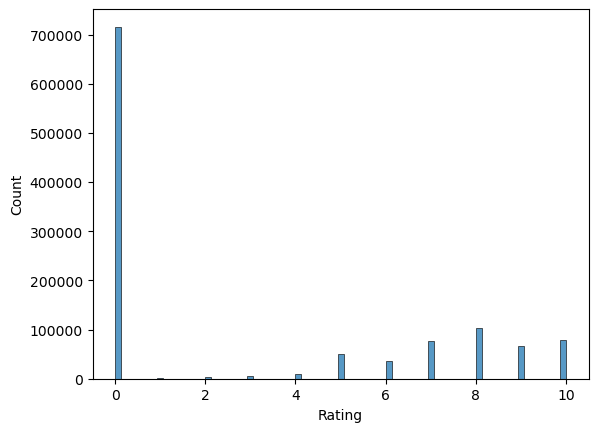

In [68]:
sns.histplot(data = rating["Rating"])

In [69]:
y = rating['Rating'].value_counts(ascending=False).reset_index()
y.head(12)

,index,Rating
0,0,716109
1,8,103736
2,10,78610
3,7,76457
4,9,67541
5,5,50974
6,6,36924
7,4,8904
8,3,5996
9,2,2759


In [70]:
print("books rows ",books.shape)
print("ratings rows",rating.shape)

books rows  (271038, 8)
ratings rows (1149780, 3)


In [71]:
# the book rating with "0" indicates that these books are not rated and 
#also we sholud see that does we have the rated books details in books dataset

In [72]:
rating_new = rating[rating['ISBN'].isin(books['ISBN'])]
print("rating_new dimension",rating_new.shape)
rating_new

rating_new dimension (1031128, 3)


,User,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [73]:
print("rating_new dimension",rating_new.shape)
print("rating dimension",rating.shape)

rating_new dimension (1031128, 3)
rating dimension (1149780, 3)


In [74]:
x=1149780-1031128
print("the no ratings that we dont have the books data is",x)

the no ratings that we dont have the books data is 118652


In [75]:
# now we have to find the books that have no ratings i.e) Zero rating=647291

In [76]:
y = rating_new['Rating'].value_counts(ascending=False).reset_index()
y.head(12)

,index,Rating
0,0,647291
1,8,91803
2,10,71225
3,7,66401
4,9,60775
5,5,45355
6,6,31687
7,4,7617
8,3,5118
9,2,2375


the Zero rating are considered to be implicit rating which has no influence in the model                                
hence we are splitting the dataset into implicit and explicit dataset


In [77]:
# Explicit Ratings Dataset
exp_rating = rating_new[rating_new['Rating'] != 0]
exp_rating = exp_rating.reset_index(drop = True)
exp_rating.shape

(383837, 3)

In [78]:
# Implicit Ratings Dataset
imp_rating = rating_new[rating_new['Rating'] == 0]
imp_rating = imp_rating.reset_index(drop = True)
imp_rating.shape

(647291, 3)

In [79]:
# only explicit dataset is to used for recomendation system

<AxesSubplot:xlabel='Rating', ylabel='count'>

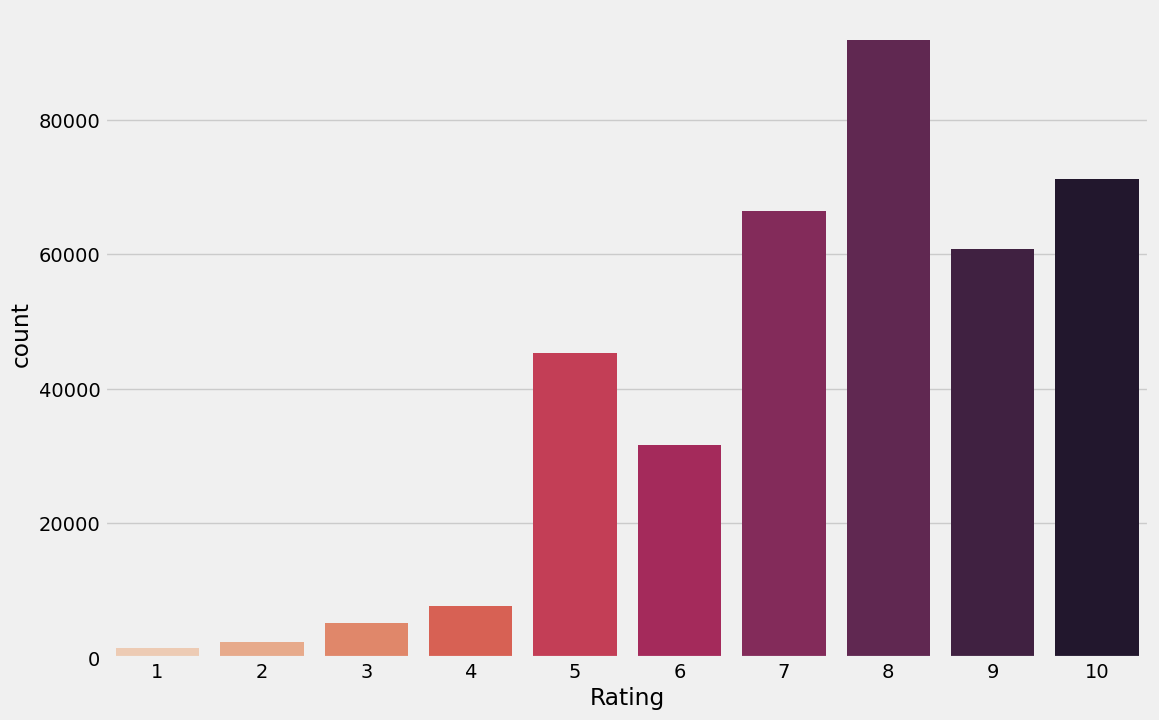

In [80]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=exp_rating , x='Rating', palette='rocket_r')

In [81]:
# Create column Rating average 
exp_rating['Avg_Rating']=round(exp_rating.groupby('ISBN')['Rating'].transform('mean'),3)
# Create column Rating sum
exp_rating['Total_No_Of_Users_Rated']=exp_rating.groupby('ISBN')['Rating'].transform('count')

In [82]:
exp_rating

,User,ISBN,Rating,Avg_Rating,Total_No_Of_Users_Rated
0,276726,0155061224,5,5.000,1
1,276729,052165615X,3,3.000,1
2,276729,0521795028,6,6.000,1
3,276744,038550120X,7,7.580,81
4,276747,0060517794,9,8.000,30
...,...,...,...,...,...
383832,276704,0743211383,7,6.965,57
383833,276704,0806917695,5,5.000,1
383834,276704,1563526298,9,7.000,3
383835,276709,0515107662,10,8.444,18


### Users

In [83]:
user=pd.read_csv("Users.csv")
user

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [84]:
def missing_values(user):
    mis_val=user.isnull().sum()
    mis_val_percent=round(user.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={user.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=user.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [85]:
missing_values(user)

,index,Missing Values,% of Total Values,Data_type
0,Age,110762,39.72,float64
1,User-ID,0,0.00,int64
2,Location,0,0.00,object


Age have around 39% missing values

#### Age distribution

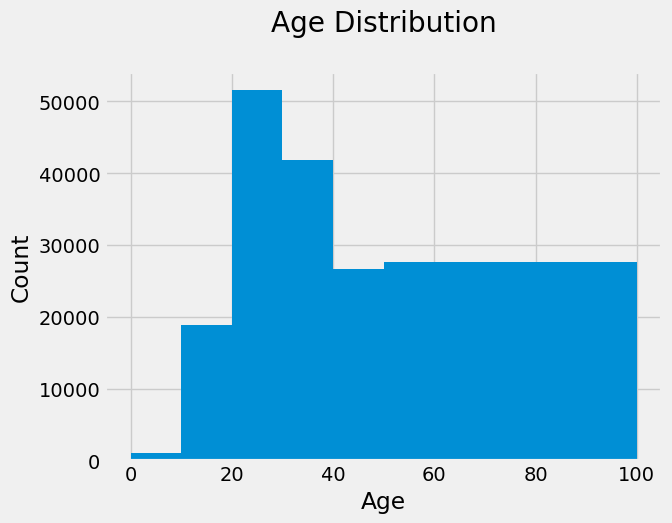

In [86]:
user.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

from this it is seen that more active users are in the age range of 20-40

to check the outliers in the columns

Text(0.5, 1.0, 'Find outlier data in Age column')

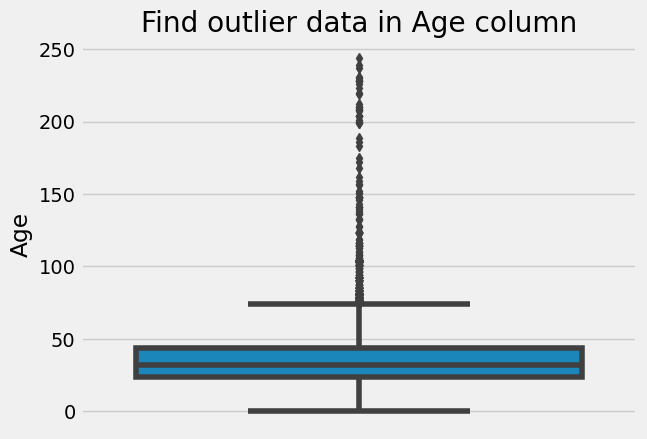

In [87]:
sns.boxplot(y='Age', data=user)
plt.title('Find outlier data in Age column')

In [88]:
print(sorted(user.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [89]:
median_age = user['Age'].median()
median_age

32.0

In [90]:
# Replacing all null values with median
user['Age'] = user['Age'].fillna(median_age)

In [91]:
user['Age'].isnull().sum()

0

Now there are no null values

In [92]:
def age_group(age):
    
    if age<15:
        x='Children'
    elif age>=15 and age<35:
        x='Youth'
    elif age>=35 and age<65:
        x='Adults'
    else:
        x='Senior Citizens'
    return x

In [93]:
user['Age_group']=user['Age'].apply(lambda x: age_group(x))

In [94]:
user.head()

,User-ID,Location,Age,Age_group
0,1,"nyc, new york, usa",32.0,Youth
1,2,"stockton, california, usa",18.0,Youth
2,3,"moscow, yukon territory, russia",32.0,Youth
3,4,"porto, v.n.gaia, portugal",17.0,Youth
4,5,"farnborough, hants, united kingdom",32.0,Youth


Text(0.5, 1.0, 'Age Distribution')

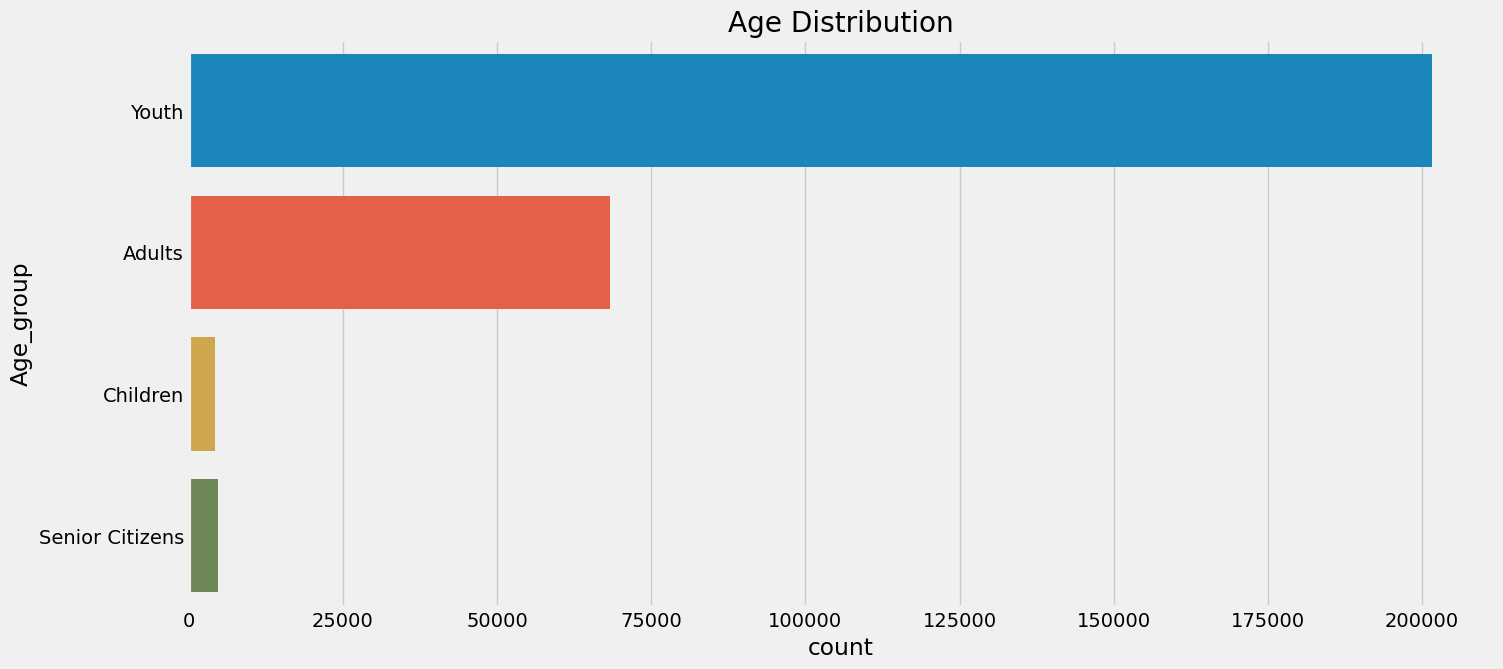

In [95]:
plt.figure(figsize=(15,7))
sns.countplot(y='Age_group',data=user)
plt.title('Age Distribution')

In [96]:
user[user.duplicated()]

,User-ID,Location,Age,Age_group


In [97]:
item_counts = user["Location"].value_counts()
print(item_counts)


london, england, united kingdom                  2506
toronto, ontario, canada                         2250
sydney, new south wales, australia               1744
melbourne, victoria, australia                   1708
portland, oregon, usa                            1629
                                                 ... 
gneisenaustr. 3, nordrhein-westfalen, germany       1
-, bayern, germany                                  1
bouchegouf, guelma, algeria                         1
indiana and philadelphia, pennsylvania, usa         1
tacoma, washington, united kingdom                  1
Name: Location, Length: 57339, dtype: int64


In [98]:
user.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [99]:
user.Location.nunique()

57339

In [100]:
for i in user:
    user['Country']=user.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$') 

In [101]:
#drop location column
user.drop('Location',axis=1,inplace=True)

In [102]:
user.isnull().sum()

User-ID        0
Age            0
Age_group      0
Country      368
dtype: int64

In [103]:
user['Country']=user['Country'].astype('str')

In [104]:
a=list(user.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

In [105]:
user['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                               ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

many of the data has misspelling values 

Text(0.5, 1.0, 'Count of users Country wise')

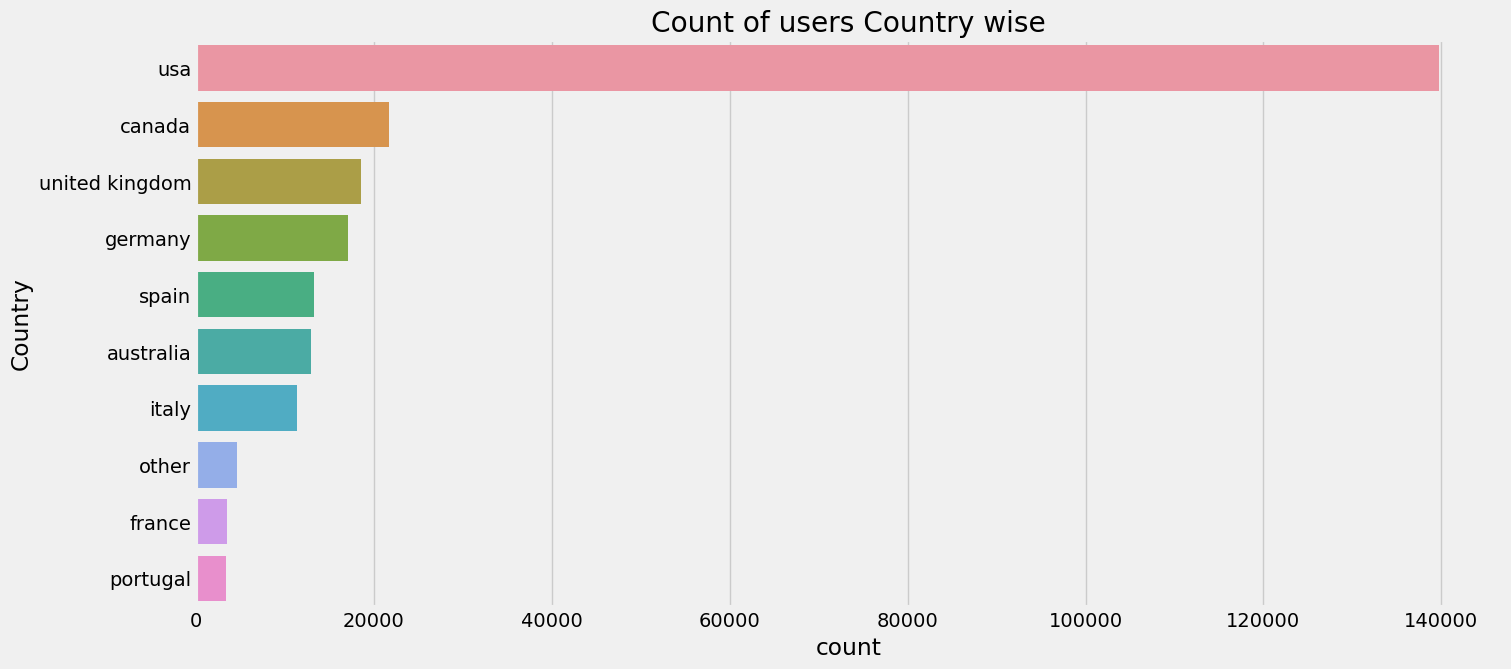

In [106]:
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=user,order=pd.value_counts(user['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

from this it is founf that there are many user from the usa

In [107]:
user=user.rename(columns={"User-ID":"User"})
user.head()

,User,Age,Age_group,Country
0,1,32.0,Youth,usa
1,2,18.0,Youth,usa
2,3,32.0,Youth,russia
3,4,17.0,Youth,portugal
4,5,32.0,Youth,united kingdom


In [108]:
user.isnull().sum()

User         0
Age          0
Age_group    0
Country      0
dtype: int64

## EDA

Text(0.5, 1.0, 'Top 50 Authors with most published number of books')

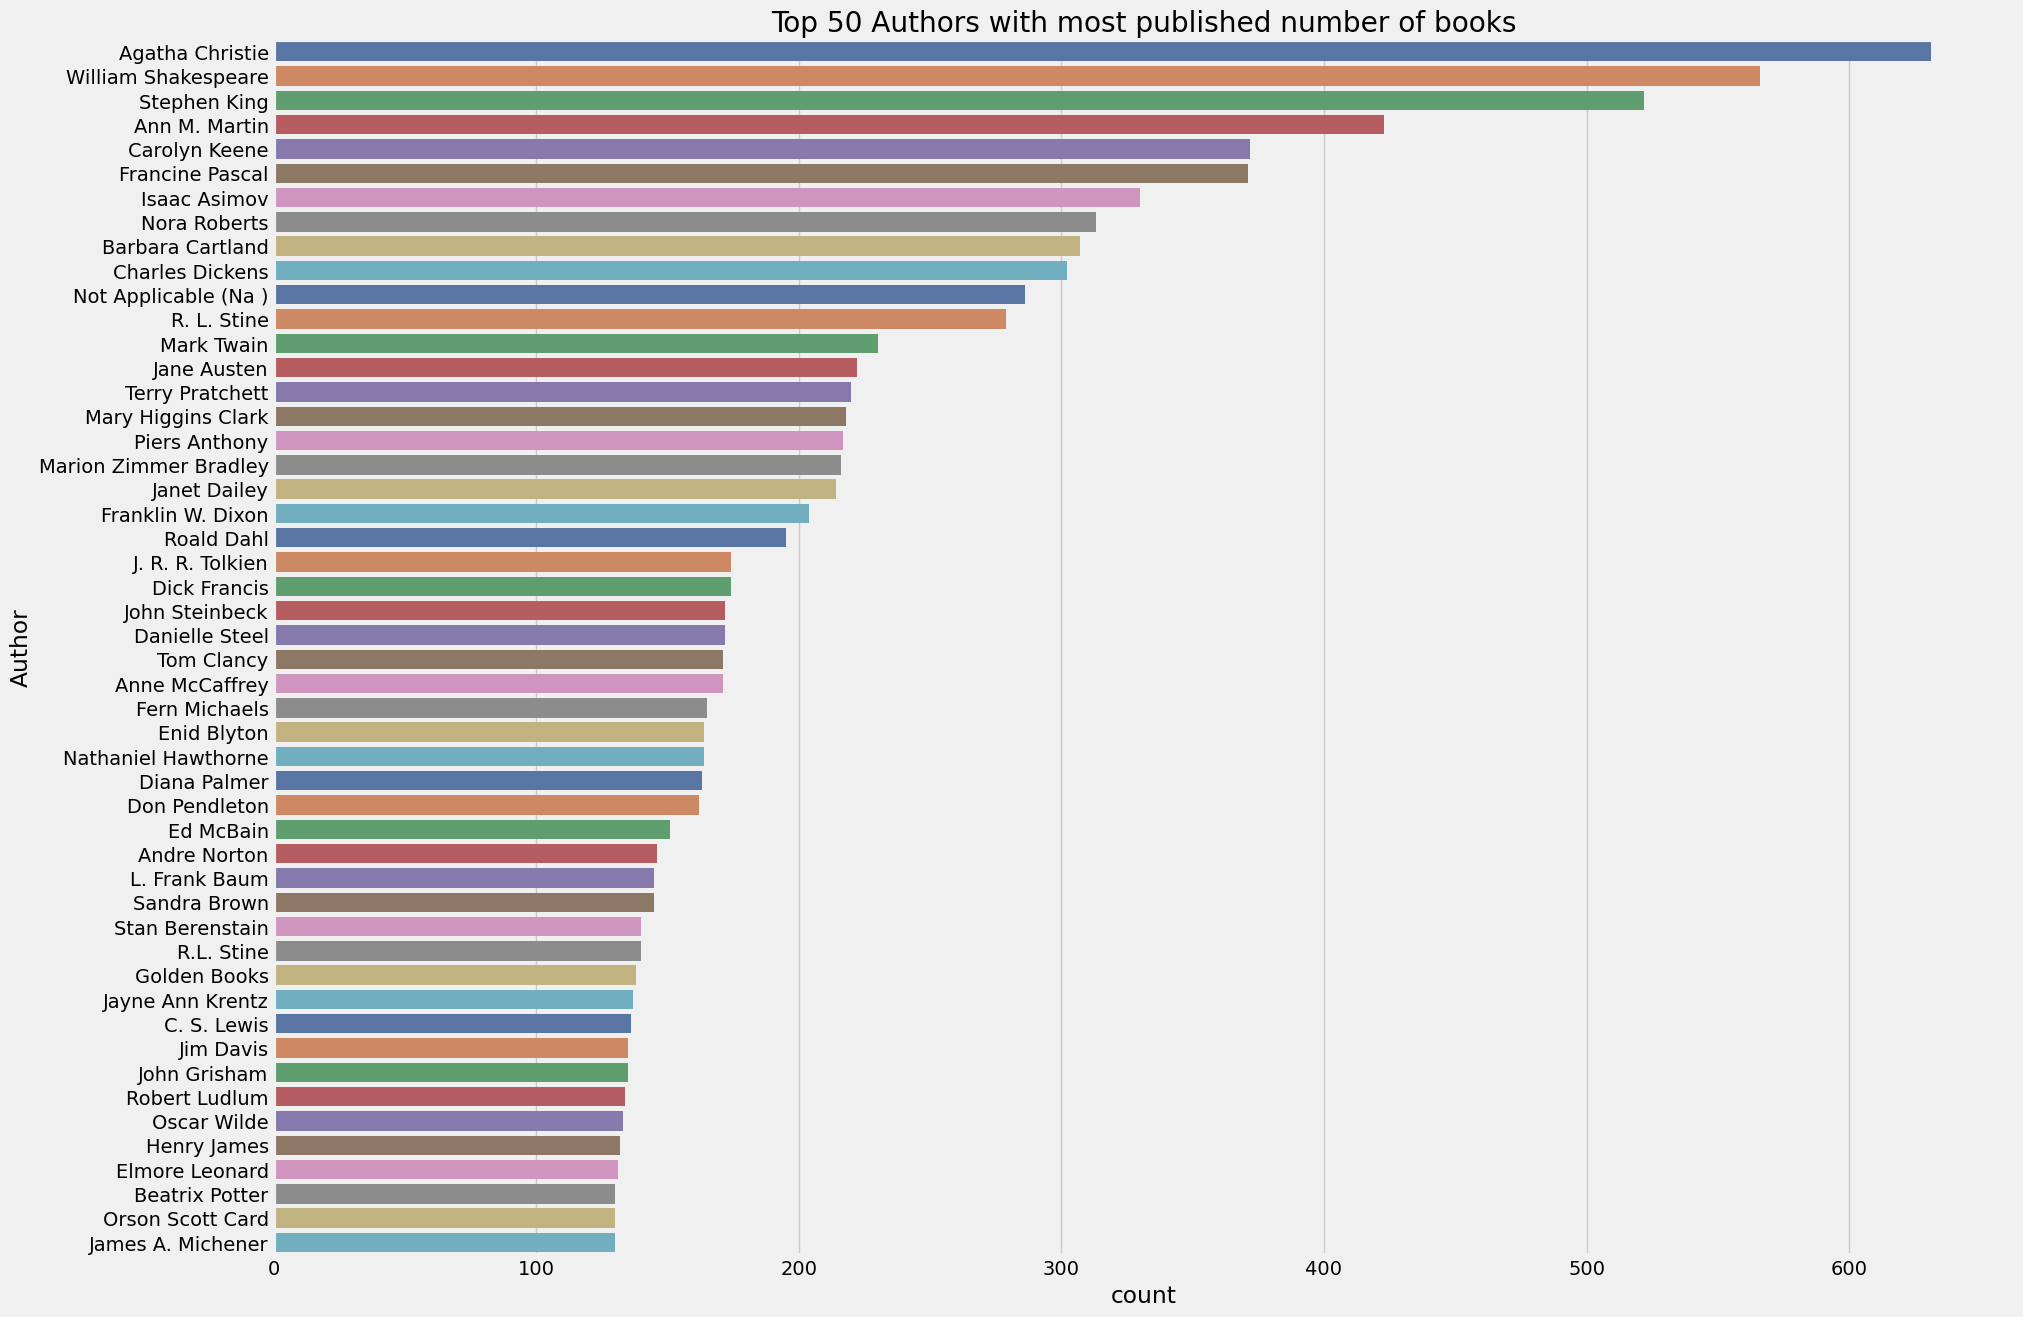

In [109]:
plt.figure(figsize=(20,15))
sns.countplot(y="Author", data=books, order=books['Author'].value_counts().index[0:50], palette='deep')
plt.title("Top 50 Authors with most published number of books")

Text(0.5, 1.0, 'Top 50 Publishers with number of books published')

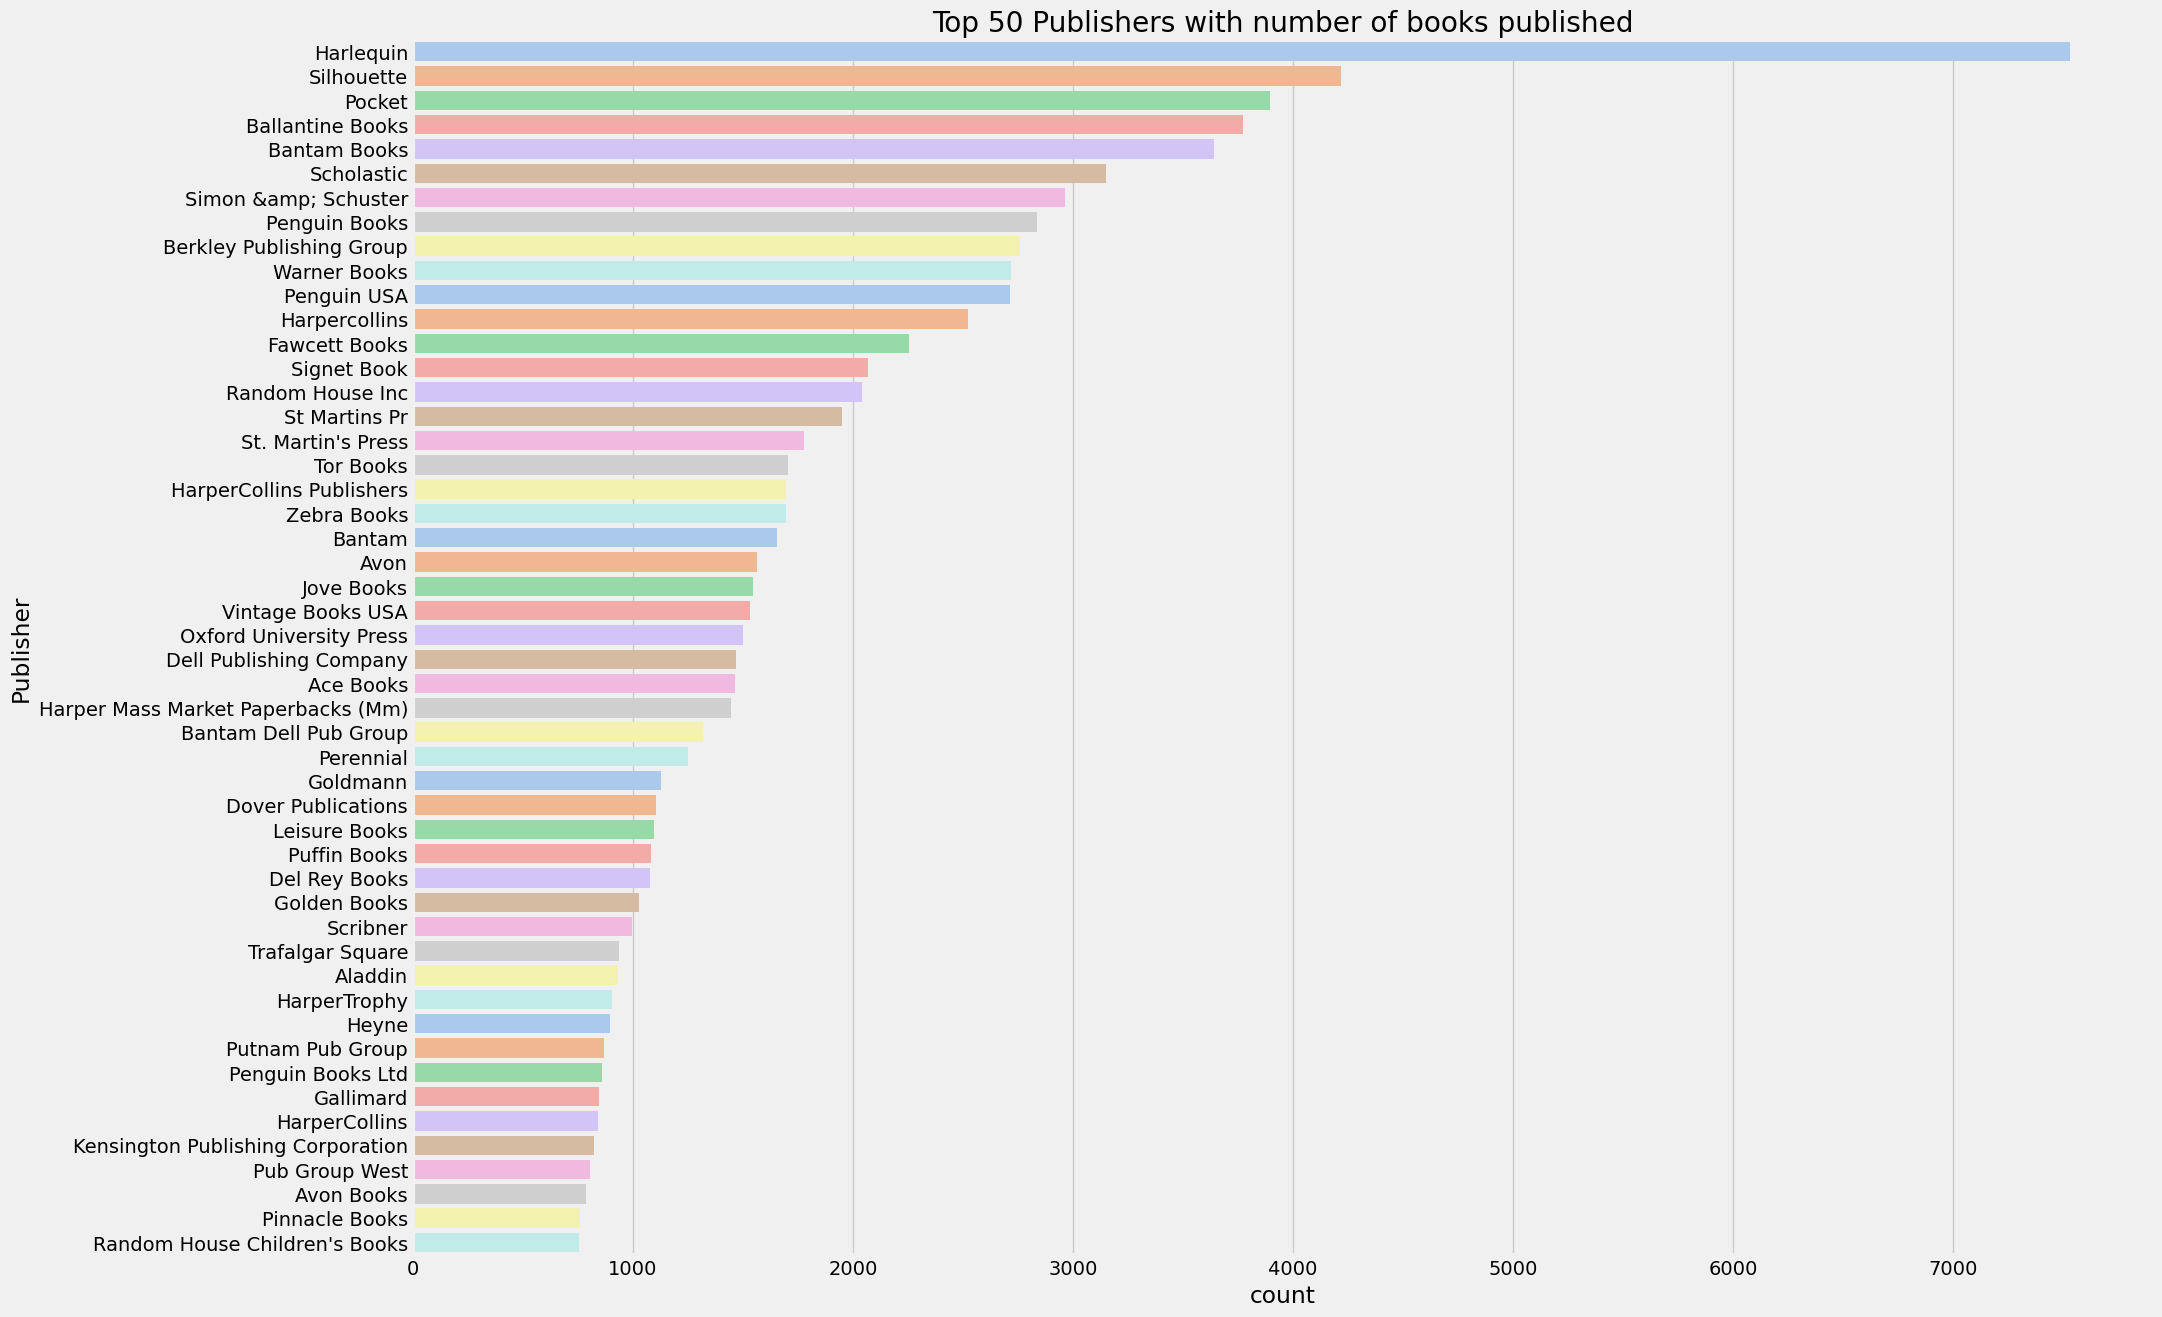

In [110]:
plt.figure(figsize=(20,15))
sns.countplot(y="Publisher", palette = 'pastel', data=books, order=books['Publisher'].value_counts().index[0:50])
plt.title("Top 50 Publishers with number of books published")

in this graph the year 2002 is found to be maximum because this value has been imputed as mode


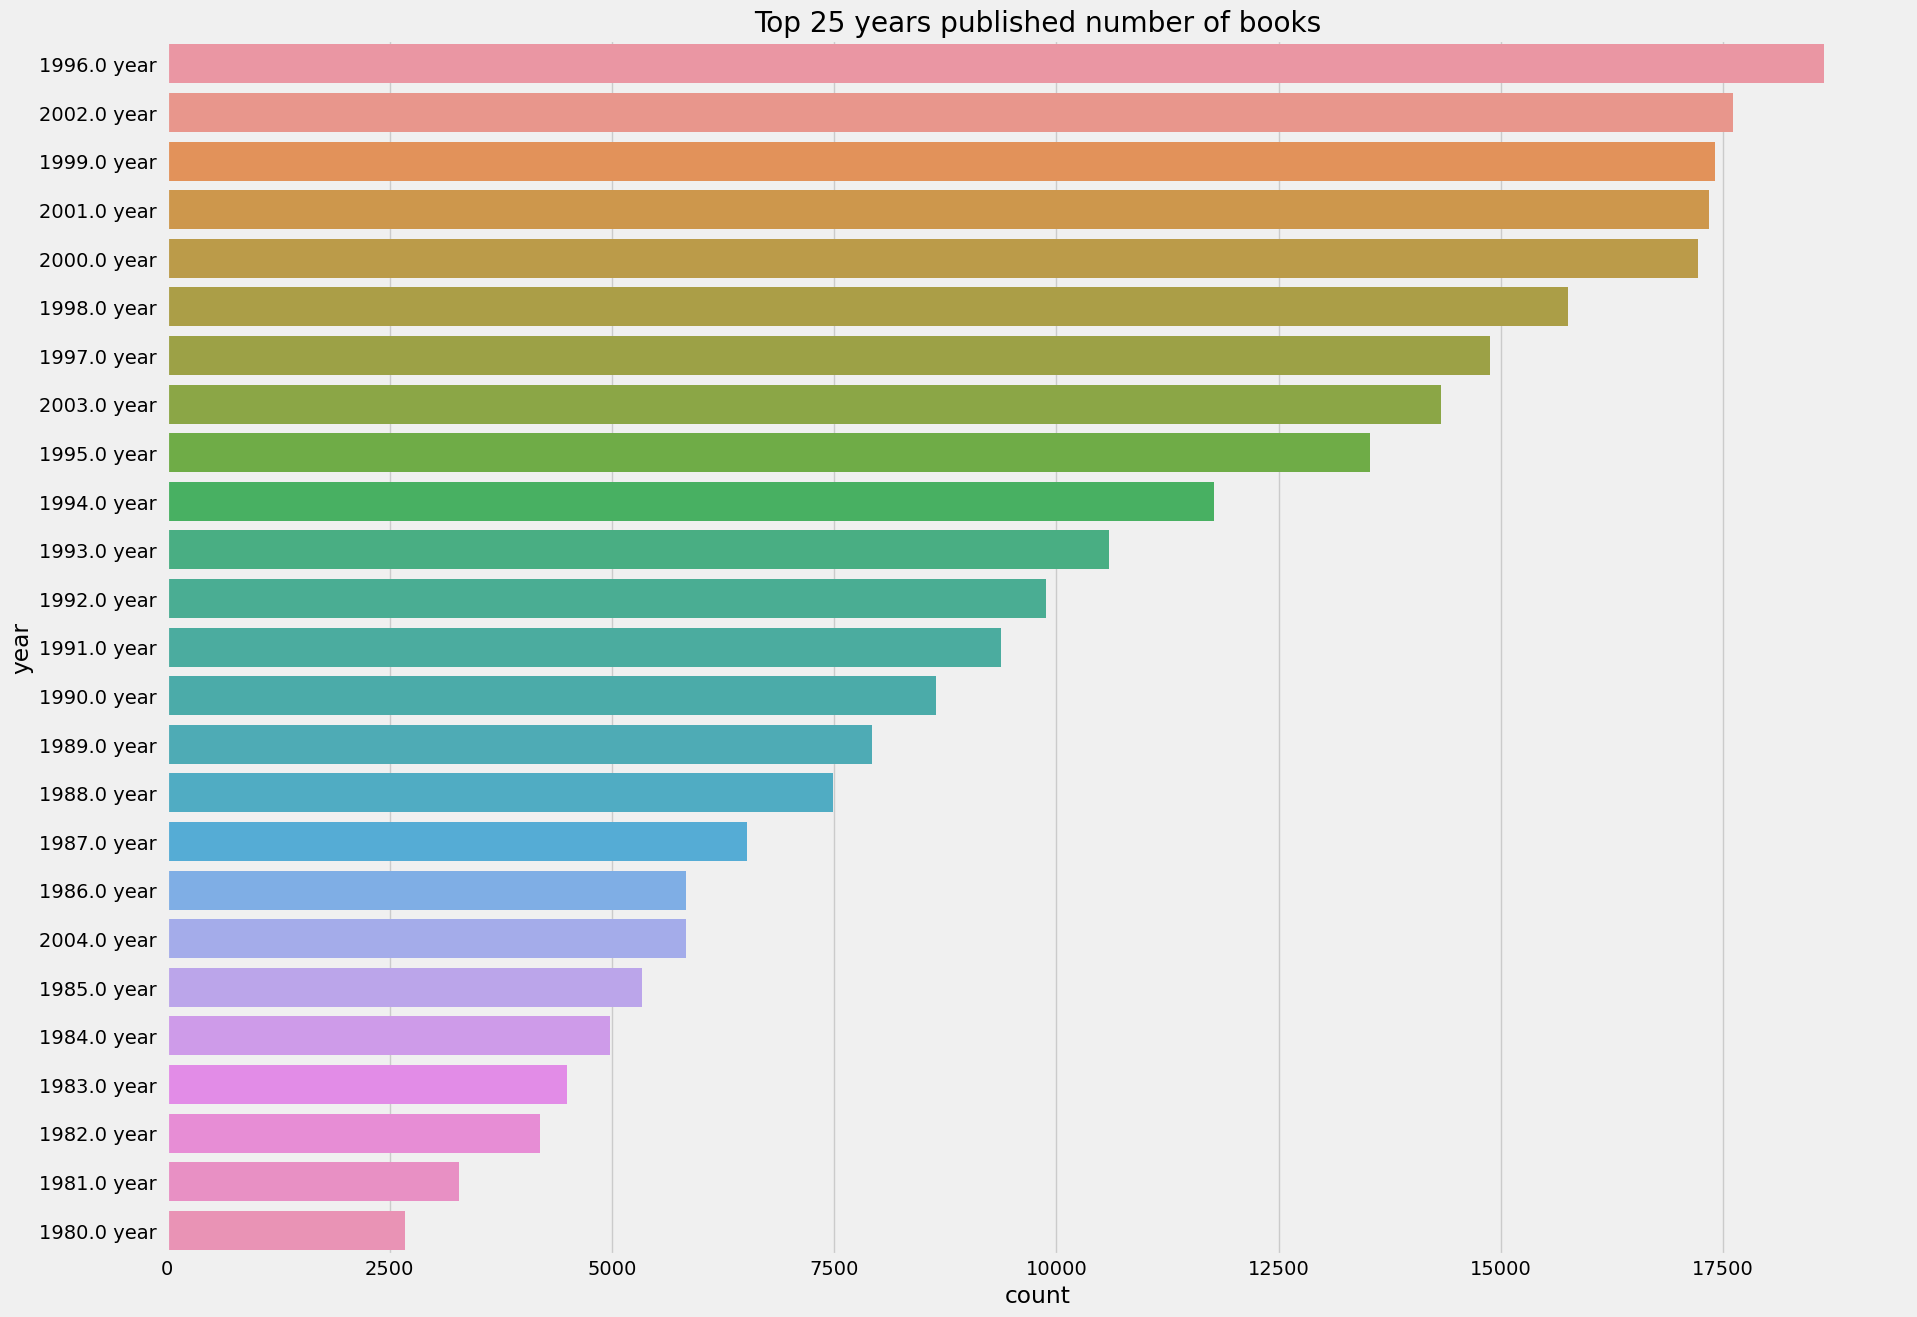

In [111]:
yr = books['Year'].value_counts().reset_index()
yr.columns = ['value', 'count']
yr['year'] = yr['value'].astype(str) + ' year '

plt.figure(figsize=(20,15))
plt.title('Top 25 years published number of books')
sns.barplot(data = yr.head(25), x='count', y="year")
print("in this graph the year 2002 is found to be maximum because this value has been imputed as mode")

Text(0.5, 1.0, 'Top 15 Country with highest user')

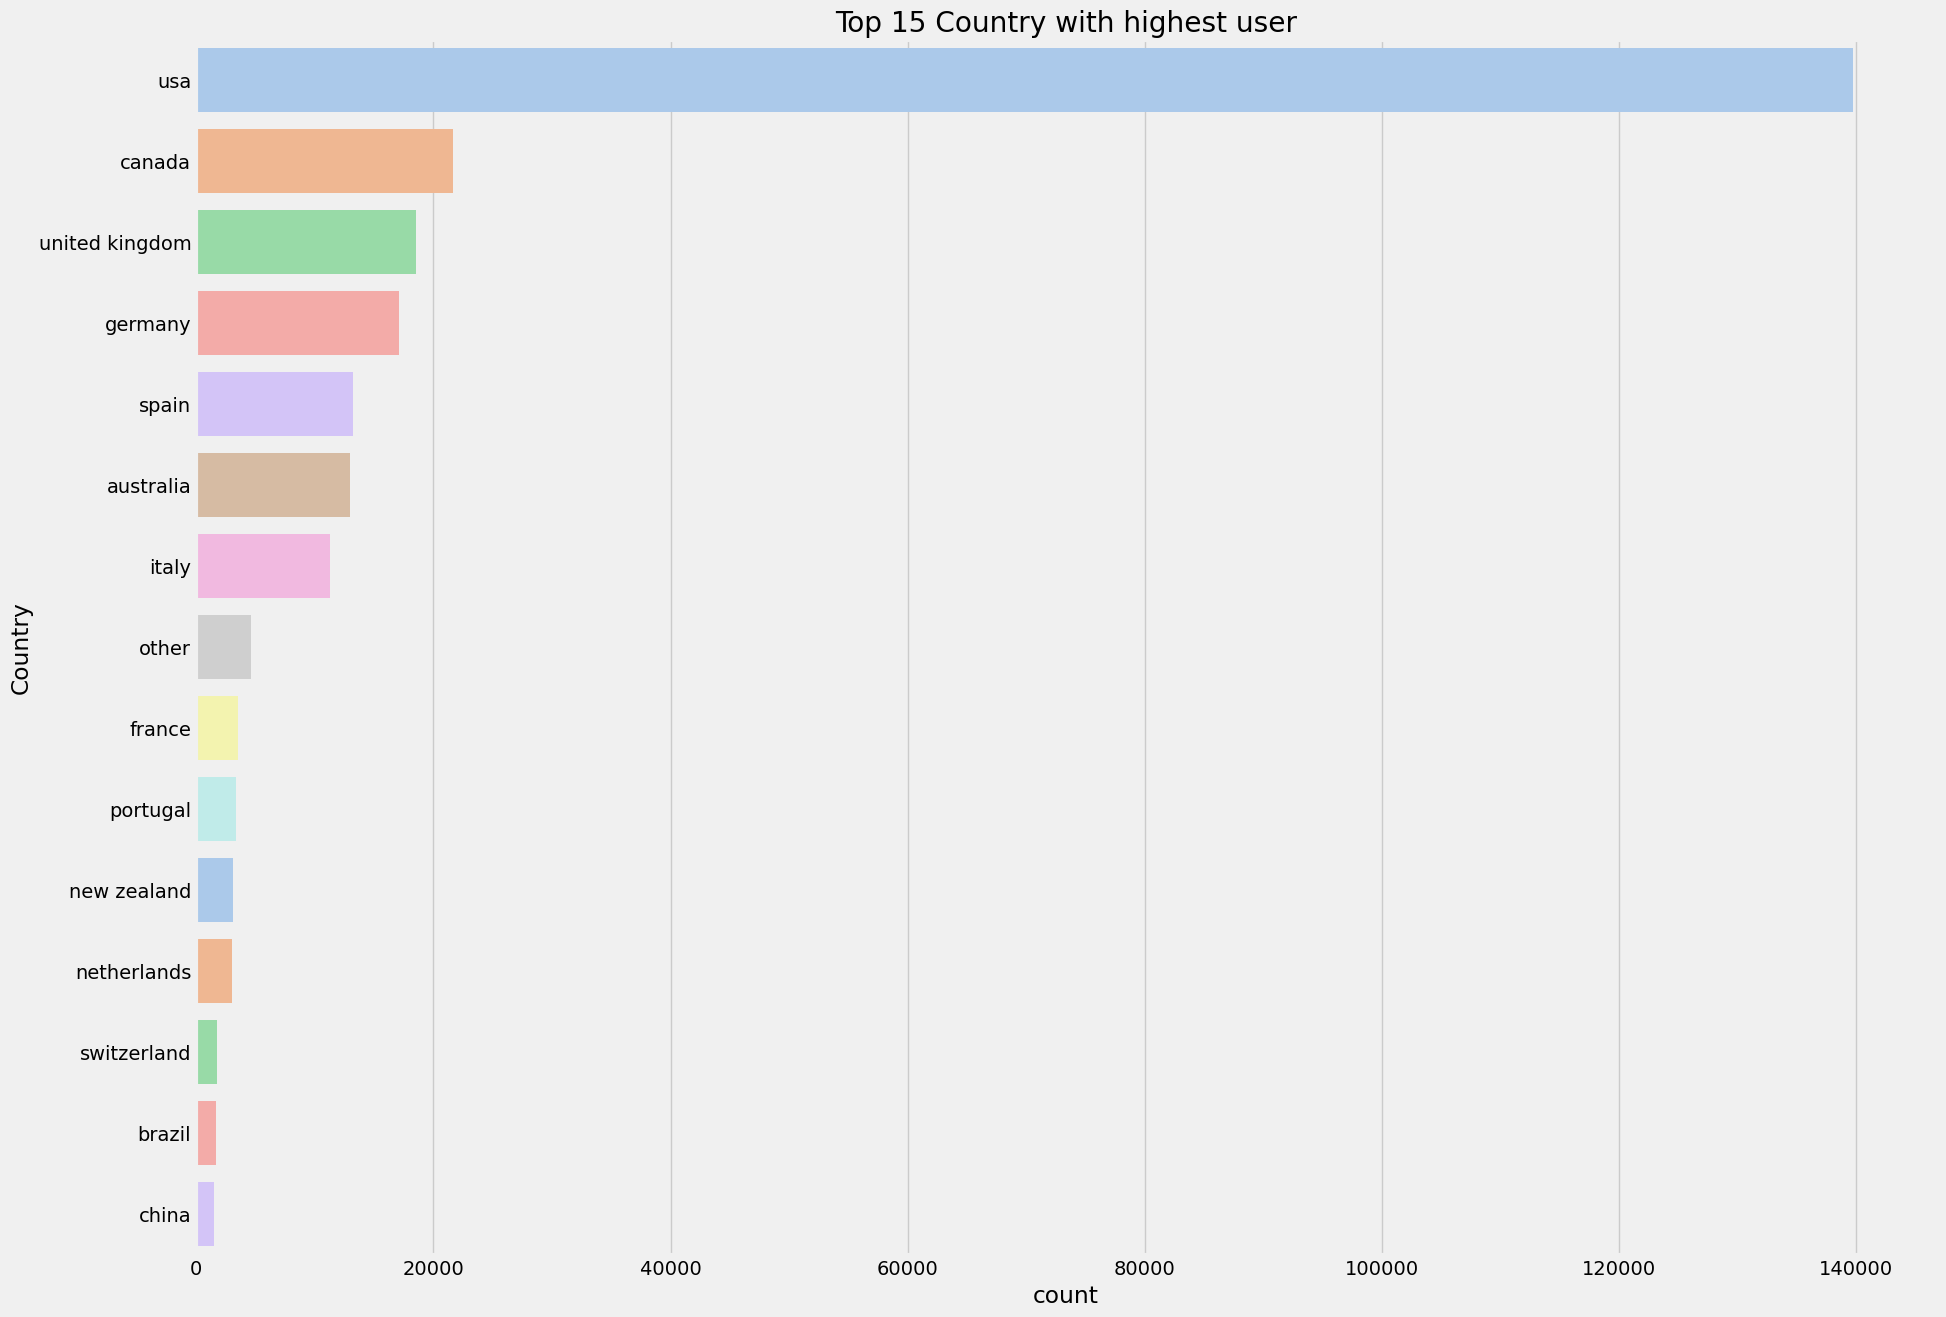

In [112]:
plt.figure(figsize=(20,15))
sns.countplot(y="Country", palette = 'pastel', data=user, order=user['Country'].value_counts().index[0:15])
plt.title("Top 15 Country with highest user")

Text(0.5, 1.0, 'Explicit Ratings Count')

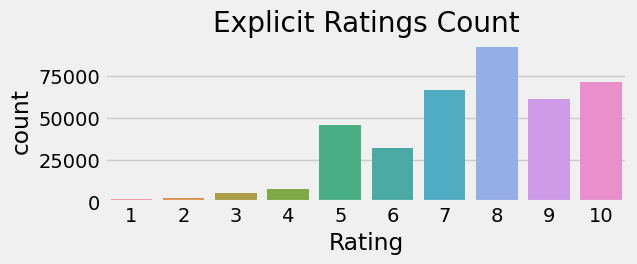

In [113]:
plt.figure(figsize=(6,2))
sns.countplot(x="Rating", data=exp_rating)
plt.title("Explicit Ratings Count")

## merging of the datasets

In [114]:
books.head()

,ISBN,Title,Author,Year,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [115]:
exp_rating.head()

,User,ISBN,Rating,Avg_Rating,Total_No_Of_Users_Rated
0,276726,0155061224,5,5.00,1
1,276729,052165615X,3,3.00,1
2,276729,0521795028,6,6.00,1
3,276744,038550120X,7,7.58,81
4,276747,0060517794,9,8.00,30


In [116]:
user.head()

,User,Age,Age_group,Country
0,1,32.0,Youth,usa
1,2,18.0,Youth,usa
2,3,32.0,Youth,russia
3,4,17.0,Youth,portugal
4,5,32.0,Youth,united kingdom


In [117]:
print("user_dimension  ",user.shape)
print("Rating_dimension",exp_rating.shape)
print("books_dimension ",books.shape)

user_dimension   (278858, 4)
Rating_dimension (383837, 5)
books_dimension  (271038, 8)


In [118]:
df_rec = pd.merge(books, exp_rating, on='ISBN', how='inner')
df_rec = pd.merge(df_rec, user, on='User', how='inner')
df_rec

,ISBN,Title,Author,Year,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,User,Rating,Avg_Rating,Total_No_Of_Users_Rated,Age,Age_group,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,7.667,9,32.0,Youth,canada
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,8,5,5.000,1,32.0,Youth,canada
2,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,8,5,5.000,1,32.0,Youth,canada
3,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,8,5,5.000,1,32.0,Youth,canada
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,8,6,6.000,1,32.0,Youth,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383832,8441407487,Sobre La Utilidad y Los Perjuicios de La Historia,Friedrich Wilhelm Nietzsche,2000.0,Edaf,http://images.amazon.com/images/P/8441407487.0...,http://images.amazon.com/images/P/8441407487.0...,http://images.amazon.com/images/P/8441407487.0...,246590,6,6.000,1,20.0,Youth,spain
383833,087004124X,Anthem,Ayn Rand,1966.0,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,259589,8,8.000,1,19.0,Youth,usa
383834,158243123X,A Student of Weather,Elizabeth Hay,2001.0,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,259591,8,8.000,1,39.0,Adults,usa
383835,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981.0,Ediciones Fraile,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,259614,10,10.000,1,22.0,Youth,spain


In [119]:
df_rec["Year"] = df_rec["Year"].astype(int)

In [120]:
df_rec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383837 entries, 0 to 383836
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ISBN                     383837 non-null  object 
 1   Title                    383837 non-null  object 
 2   Author                   383837 non-null  object 
 3   Year                     383837 non-null  int32  
 4   Publisher                383837 non-null  object 
 5   Image_URL_S              383837 non-null  object 
 6   Image_URL_M              383837 non-null  object 
 7   Image_URL_L              383837 non-null  object 
 8   User                     383837 non-null  int64  
 9   Rating                   383837 non-null  int64  
 10  Avg_Rating               383837 non-null  float64
 11  Total_No_Of_Users_Rated  383837 non-null  int64  
 12  Age                      383837 non-null  float64
 13  Age_group                383837 non-null  object 
 14  Coun

In [121]:
df_rec.isnull().sum()

ISBN                       0
Title                      0
Author                     0
Year                       0
Publisher                  0
Image_URL_S                0
Image_URL_M                0
Image_URL_L                0
User                       0
Rating                     0
Avg_Rating                 0
Total_No_Of_Users_Rated    0
Age                        0
Age_group                  0
Country                    0
dtype: int64

In [122]:
df_rec.duplicated().sum()

0

Text(0.5, 1.0, 'Top 50 books that are most rated')

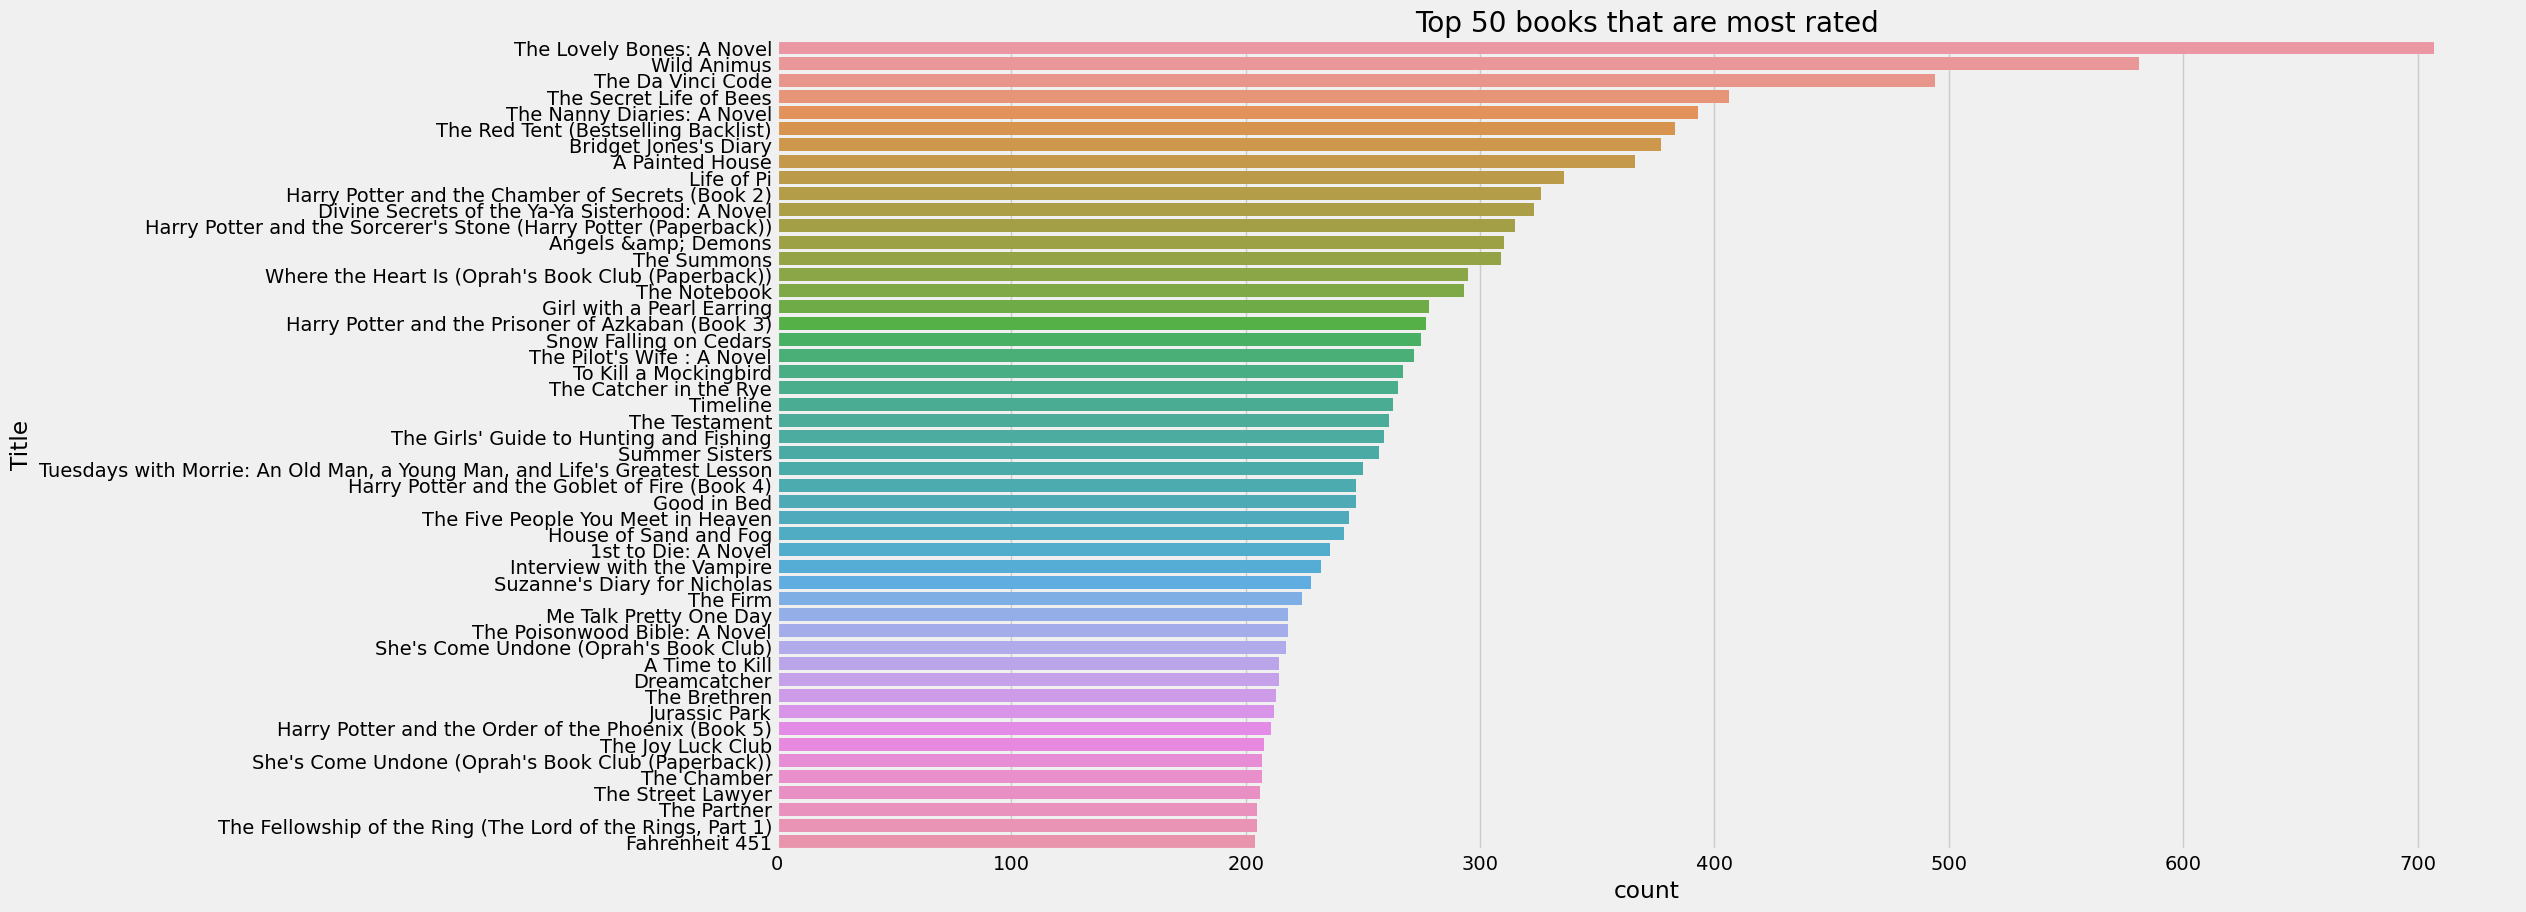

In [123]:
plt.figure(figsize=(20,10))
sns.countplot(y=df_rec["Title"], data=df_rec, order=df_rec['Title'].value_counts().index[0:50])
plt.title("Top 50 books that are most rated")

In [124]:
rating_count = pd.DataFrame(df_rec.groupby('ISBN')['Rating'].count())
rating_count.sort_values('Rating', ascending=False).head()

,Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


In [125]:
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,Title,Author,Year,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
1,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...


The book that received the most rating counts in this data set is Rich Shapero’s “Wild Animus”. And there is something in common among these five books that received the most rating counts — they are all novels. So it is conclusive that novels are popular and likely receive more ratings.

# Recomendation system

# Model-01
### Popularity Based Filtering                                                                                                                                                                                                                             

As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any book which is usually bought by every new user then there are chances that it may suggest that    book to the user who just signed up.                                                                  
Book weighted avg formula:                                                                  
Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]                                                                  
where,                                                                                    
v is the number of votes for the books;                                                                  
m is the minimum votes required to be listed in the chart;                                                                  
R is the average rating of the book; and                                                                  
C is the mean vote across the whole report.                                                                  
Now we find the values of v,m,R,C.                                                                  

In [126]:
C= df_rec['Avg_Rating'].mean()
m= df_rec['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = df_rec.loc[df_rec['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.626692210496009 , m=65.0


(38402, 15)

Here we used 90th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more votes than at least 90% of the books in the list.                                                                                              
We see that there are 38402 books which qualify to be in this list. Now, we need to calculate our metric for each qualified book. To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books:

In [127]:
def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)
    
Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)
 
 
 #Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [128]:
Top_Books

,ISBN,Title,Author,Year,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,User,Rating,Avg_Rating,Total_No_Of_Users_Rated,Age,Age_group,Country,Score
311243,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,103488,10,9.263,137,32.0,Youth,usa,8.736465
311250,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,248015,8,9.263,137,32.0,Youth,usa,8.736465
223791,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,160434,8,9.263,137,29.0,Youth,usa,8.736465
311247,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,213718,10,9.263,137,32.0,Youth,usa,8.736465
275466,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,111731,10,9.263,137,26.0,Youth,usa,8.736465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27243,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,168047,1,4.391,581,28.0,Youth,usa,4.716573
27163,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,167800,3,4.391,581,57.0,Adults,usa,4.716573
27153,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,166546,3,4.391,581,53.0,Adults,france,4.716573
27152,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,165637,5,4.391,581,29.0,Youth,malaysia,4.716573


In [129]:
#Keeping only one entry of each book
Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('yellow',as_cmap=True)
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [130]:
#Printing the top 20 books
Top_Books[['Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(30).style.background_gradient(cmap=cm)

,Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),137,9.263000,8.736465
1,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),315,8.937000,8.712868
2,Harry Potter and the Order of the Phoenix (Book 5),207,9.039000,8.701500
3,To Kill a Mockingbird,214,8.944000,8.637100
4,Harry Potter and the Prisoner of Azkaban (Book 3),133,9.083000,8.604919
5,Harry Potter and the Prisoner of Azkaban (Book 3),141,9.035000,8.590631
6,"The Return of the King (The Lord of the Rings, Part 3)",77,9.403000,8.589901
7,Harry Potter and the Sorcerer's Stone (Book 1),119,8.983000,8.503870
8,Harry Potter and the Chamber of Secrets (Book 2),189,8.783000,8.487094
9,Harry Potter and the Chamber of Secrets (Book 2),126,8.921000,8.480529


The Popularity based recommender provide a general chart of recommended books to all the users. They are not sensitive to the interests and tastes of a particular user.

In [131]:
Top_Books.head(2)

,ISBN,Title,Author,Year,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,User,Rating,Avg_Rating,Total_No_Of_Users_Rated,Age,Age_group,Country,Score
311243,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,103488,10,9.263,137,32.0,Youth,usa,8.736465
275445,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,94485,10,8.937,315,21.0,Youth,usa,8.712868


In [132]:
popular_df=Top_Books[["Title","Author","Image_URL_M","Total_No_Of_Users_Rated","Avg_Rating"]]

In [133]:
popular_df

,Title,Author,Image_URL_M,Total_No_Of_Users_Rated,Avg_Rating
311243,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,137,9.263
275445,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,315,8.937
227812,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,207,9.039
42225,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,214,8.944
204969,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136369.0...,133,9.083
...,...,...,...,...,...
171269,Vinegar Hill (Oprah's Book Club (Paperback)),A. Manette Ansay,http://images.amazon.com/images/P/0380730138.0...,89,6.685
184791,Songs in Ordinary Time (Oprah's Book Club (Pap...,Mary McGarry Morris,http://images.amazon.com/images/P/0140244824.0...,66,6.530
221389,How to Be Good,Nick Hornby,http://images.amazon.com/images/P/1573229326.0...,104,6.673
60044,Isle of Dogs,Patricia Cornwell,http://images.amazon.com/images/P/0425182908.0...,71,5.338


## Model-02
### Collabrative recomendation system

In [134]:
# creating the pivot table

In [135]:
df_rec

,ISBN,Title,Author,Year,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,User,Rating,Avg_Rating,Total_No_Of_Users_Rated,Age,Age_group,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,7.667,9,32.0,Youth,canada
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,8,5,5.000,1,32.0,Youth,canada
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,8,5,5.000,1,32.0,Youth,canada
3,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,8,5,5.000,1,32.0,Youth,canada
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,8,6,6.000,1,32.0,Youth,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383832,8441407487,Sobre La Utilidad y Los Perjuicios de La Historia,Friedrich Wilhelm Nietzsche,2000,Edaf,http://images.amazon.com/images/P/8441407487.0...,http://images.amazon.com/images/P/8441407487.0...,http://images.amazon.com/images/P/8441407487.0...,246590,6,6.000,1,20.0,Youth,spain
383833,087004124X,Anthem,Ayn Rand,1966,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,259589,8,8.000,1,19.0,Youth,usa
383834,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,259591,8,8.000,1,39.0,Adults,usa
383835,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981,Ediciones Fraile,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,259614,10,10.000,1,22.0,Youth,spain


In [136]:
final_rating=df_rec[df_rec['Total_No_Of_Users_Rated']>=20]

In [137]:
final_rating

,ISBN,Title,Author,Year,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,User,Rating,Avg_Rating,Total_No_Of_Users_Rated,Age,Age_group,Country
10,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,11676,9,7.704,169,32.0,Youth,nan
11,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,11676,8,7.772,79,32.0,Youth,nan
14,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,11676,6,4.391,581,32.0,Youth,nan
15,0345417623,Timeline,MICHAEL CRICHTON,2000,Ballantine Books,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,11676,10,7.851,195,32.0,Youth,nan
17,0449005615,Seabiscuit: An American Legend,LAURA HILLENBRAND,2002,Ballantine Books,http://images.amazon.com/images/P/0449005615.0...,http://images.amazon.com/images/P/0449005615.0...,http://images.amazon.com/images/P/0449005615.0...,11676,10,8.483,120,32.0,Youth,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373725,0310205719,The Purpose-Driven Life: What on Earth Am I He...,Rick Warren,2002,Zondervan Publishing Company,http://images.amazon.com/images/P/0310205719.0...,http://images.amazon.com/images/P/0310205719.0...,http://images.amazon.com/images/P/0310205719.0...,33890,8,8.353,34,18.0,Youth,usa
373726,0310205719,The Purpose-Driven Life: What on Earth Am I He...,Rick Warren,2002,Zondervan Publishing Company,http://images.amazon.com/images/P/0310205719.0...,http://images.amazon.com/images/P/0310205719.0...,http://images.amazon.com/images/P/0310205719.0...,61964,5,8.353,34,32.0,Youth,usa
373727,0310205719,The Purpose-Driven Life: What on Earth Am I He...,Rick Warren,2002,Zondervan Publishing Company,http://images.amazon.com/images/P/0310205719.0...,http://images.amazon.com/images/P/0310205719.0...,http://images.amazon.com/images/P/0310205719.0...,91681,9,8.353,34,44.0,Adults,usa
373728,0310205719,The Purpose-Driven Life: What on Earth Am I He...,Rick Warren,2002,Zondervan Publishing Company,http://images.amazon.com/images/P/0310205719.0...,http://images.amazon.com/images/P/0310205719.0...,http://images.amazon.com/images/P/0310205719.0...,171632,10,8.353,34,39.0,Adults,united kingdom


In [138]:
final_rating.shape

(95665, 15)

In [139]:
final_rating.drop_duplicates(['User','Title'],inplace=True)

In [140]:
final_rating.shape

(95458, 15)

In [141]:
#creating the pivot table

In [142]:
book_pivot=final_rating.pivot_table(columns="User",index='Title',values="Rating")

In [143]:
book_pivot

User,9,16,17,26,32,39,42,44,51,56,...,278800,278807,278828,278832,278836,278843,278844,278846,278851,278854
Title,,,,,,,,,,,,,,,,,,,,,
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zodiac: The Eco-Thriller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"\O\"" Is for Outlaw""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
book_pivot.shape

(1911, 31398)

In [145]:
book_pivot.fillna(0,inplace=True)

In [146]:
book_pivot

User,9,16,17,26,32,39,42,44,51,56,...,278800,278807,278828,278832,278836,278843,278844,278846,278851,278854
Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zodiac: The Eco-Thriller,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
#since we dont want to calculate the distancce betwen the 0 values
#and we need only to calulate the distance between the values we will use the CSR matrix

In [148]:
# while calculating the distance the csr matrix will neglect the zeros and 
#will only calculate the distance between the valuess

In [149]:
from scipy.sparse import csr_matrix

In [150]:
book_sparse=csr_matrix(book_pivot)

In [151]:
book_sparse

<1911x31398 sparse matrix of type '<class 'numpy.float64'>'
	with 95458 stored elements in Compressed Sparse Row format>

In [152]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')


In [153]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [154]:
distance , suggestion = model.kneighbors(book_pivot.iloc[857,:].values.reshape(1,-1),n_neighbors=10)

In [155]:
distance

array([[ 0.        , 50.87238937, 51.66236541, 51.80733539, 52.1919534 ,
        52.35456045, 52.3736575 , 52.5832673 , 52.67826876, 52.70673581]])

In [156]:
#the first value is zero because it is trying to calculate the distance withitself

In [157]:
suggestion

array([[ 857,  628,  317,  398,  571, 1031,  884, 1175,  891, 1226]],
      dtype=int64)

In [158]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Morning Glory', 'Home Song',
       'Confessions of a Sociopathic Social Climber : The Katya Livingston Chronicles (Katya Livingston Chronicles (Hardcover))',
       'Divine Evil',
       'Going Home: Unfinished Business/ Island of Flowers/ Mind Over Matter',
       'Puerto Vallarta Squeeze', 'Naked Lunch', 'Small Town Girl',
       'Natural Causes', 'Sullivan's Woman (Silhouette Single Title)'],
      dtype='object', name='Title')


In [159]:
book_pivot.index[857]

'Morning Glory'

In [160]:
book_name = book_pivot.index

In [161]:
import pickle
pickle.dump(model,open('webs/model.pkl','wb'))
pickle.dump(book_name,open('webs/book_name.pkl','wb'))
pickle.dump(final_rating,open('webs/final_rating.pkl','wb'))
pickle.dump(book_pivot,open('webs/book_pivot.pkl','wb'))
pickle.dump(popular_df,open('webs/popular_df.pkl','wb'))


In [162]:
#checking the recomending function

In [163]:
def recommend_book(book_name):
    book_id=np.where(book_pivot.index==book_name)[0][0]
    distance , suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1),n_neighbors=10);
    
    for i in range(len(suggestion)):
        books=book_pivot.index[suggestion[i]]
        for j in books:
            print(j)

In [164]:
recommend_book("Home Song")

Home Song
Confessions of a Sociopathic Social Climber : The Katya Livingston Chronicles (Katya Livingston Chronicles (Hardcover))
Naked Lunch
Daddy
The Book of Shadows
Killing Time
Violin
Sullivan's Woman (Silhouette Single Title)
Generation Golf. Eine Inspektion
The Right Hand of Evil


### Model-03

### collabrative based filtering system based on cosine similarity

In [165]:
book_pivot

User,9,16,17,26,32,39,42,44,51,56,...,278800,278807,278828,278832,278836,278843,278844,278846,278851,278854
Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zodiac: The Eco-Thriller,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
from sklearn.metrics.pairwise import cosine_similarity

In [167]:
similarity_scores = cosine_similarity(book_pivot)

In [173]:
similarity_scores

array([[1.        , 0.01889688, 0.05829009, ..., 0.        , 0.02463684,
        0.02679873],
       [0.01889688, 1.        , 0.00814448, ..., 0.0566799 , 0.02919103,
        0.02182988],
       [0.05829009, 0.00814448, 1.        , ..., 0.        , 0.02681141,
        0.        ],
       ...,
       [0.        , 0.0566799 , 0.        , ..., 1.        , 0.        ,
        0.01683832],
       [0.02463684, 0.02919103, 0.02681141, ..., 0.        , 1.        ,
        0.        ],
       [0.02679873, 0.02182988, 0.        , ..., 0.01683832, 0.        ,
        1.        ]])

In [168]:
similarity_scores.shape

(1911, 1911)

In [169]:
def recommend(book_name):
    # index fetch
    index = np.where(book_pivot.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:10]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Title'] == book_pivot.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Title')['Title'].values))
        item.extend(list(temp_df.drop_duplicates('Title')['Author'].values))
        item.extend(list(temp_df.drop_duplicates('Title')['Image_URL_M'].values))
        
        data.append(item)
    
    return data

In [170]:
recommend('Home Song')

[['Small Town Girl',
  'LaVyrle Spencer',
  'http://images.amazon.com/images/P/0399142495.01.MZZZZZZZ.jpg'],
 ['Morning Glory',
  'LaVyrle Spencer',
  'http://images.amazon.com/images/P/0515102636.01.MZZZZZZZ.jpg'],
 ['That Camden Summer',
  'Lavyrle Spencer',
  'http://images.amazon.com/images/P/0399141200.01.MZZZZZZZ.jpg'],
 ['To Sir Phillip, With Love',
  'Julia Quinn',
  'http://images.amazon.com/images/P/0380820854.01.MZZZZZZZ.jpg'],
 ['Sanctuary',
  'Nora Roberts',
  'http://images.amazon.com/images/P/0515122734.01.MZZZZZZZ.jpg'],
 ['Midnight Bayou',
  'Nora Roberts',
  'http://images.amazon.com/images/P/0399148248.01.MZZZZZZZ.jpg'],
 ['The Secret Garden',
  'Frances Hodgson Burnett',
  'http://images.amazon.com/images/P/0812505018.01.MZZZZZZZ.jpg'],
 ["River's End",
  'Nora Roberts',
  'http://images.amazon.com/images/P/0515127833.01.MZZZZZZZ.jpg'],
 ['Glory in Death',
  'J. D. Robb',
  'http://images.amazon.com/images/P/0425150984.01.MZZZZZZZ.jpg']]

In [171]:
book_pivot.index[545]

'G Is for Gumshoe (Kinsey Millhone Mysteries (Paperback))'

In [172]:
pickle.dump(book_pivot,open('webs/book_pivot.pkl','wb'))
pickle.dump(books,open('webs/books.pkl','wb'))
pickle.dump(similarity_scores,open('webs/similarity_scores.pkl','wb'))